## Intro to OpenCV and Image Processing
OpenCV (Open Source Computer Vision Library) is a popular open-source computer vision and machine learning library.It is widely used in a variety of applications, including:
* Image and Video Processin
*  Computer Vision
*  Machine Learning
*  Real-time Applications

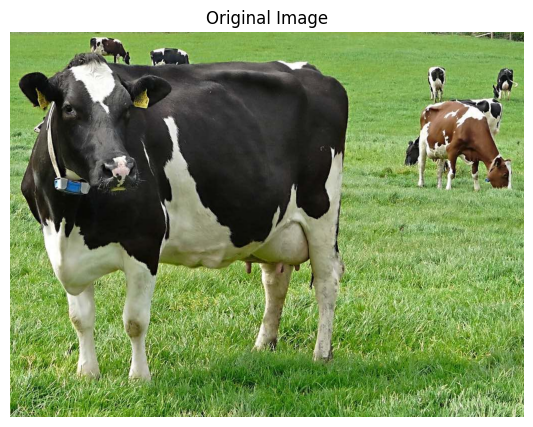

Image shape: (768, 1024, 3)


In [34]:
# Importing necessary libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 1. Loading and displaying an image
image = cv2.imread('./images/HOLSTEIN-COW.jpg')
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(10, 5))
plt.imshow(image_rgb)
plt.title('Original Image')
plt.axis('off')
plt.show()

print("Image shape:", image.shape)


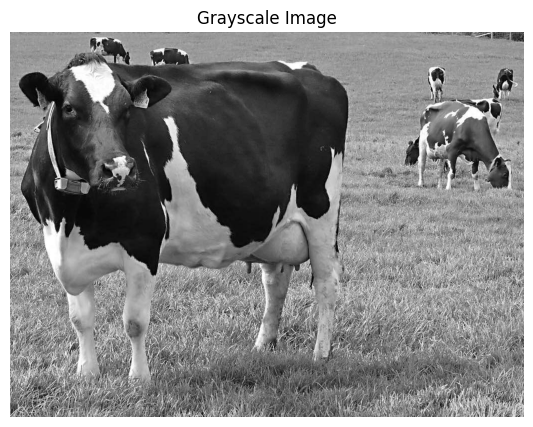

Grayscale image shape: (768, 1024)


In [35]:
# 2. Converting to grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

plt.figure(figsize=(10, 5))
plt.imshow(gray_image, cmap='gray')
plt.title('Grayscale Image')
plt.axis('off')
plt.show()

print("Grayscale image shape:", gray_image.shape)



In this step,  using the cv2.cvtColor() function to convert the original image from the BGR color space to grayscale. 
The cv2.COLOR_BGR2GRAY parameter specifies the conversion from BGR to grayscale.

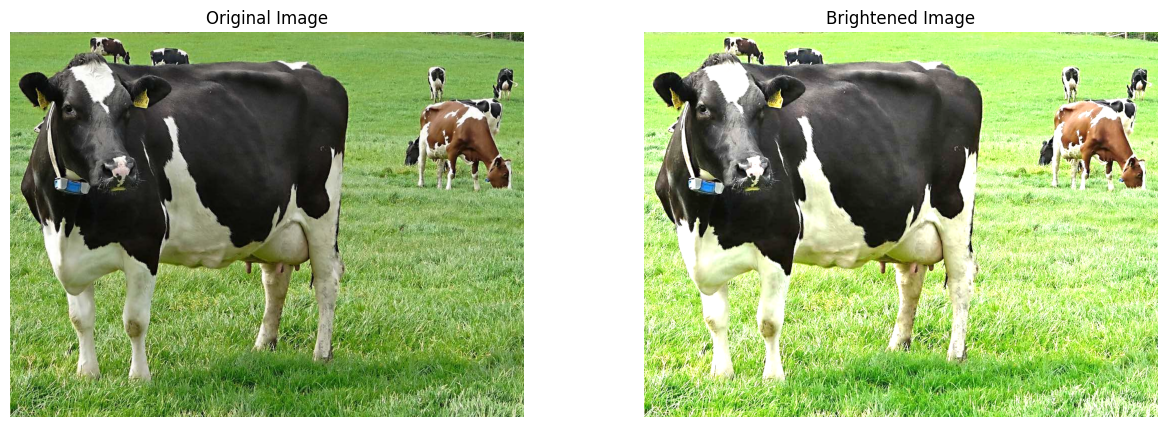

In [36]:
# 3. Point operation: Brightness adjustment
def adjust_brightness(image, factor):
    return cv2.convertScaleAbs(image, alpha=factor, beta=0)

brightened_image = adjust_brightness(image_rgb, 1.5)

plt.figure(figsize=(15, 5))
plt.subplot(121), plt.imshow(image_rgb), plt.title('Original Image'), plt.axis('off')
plt.subplot(122), plt.imshow(brightened_image), plt.title('Brightened Image'), plt.axis('off')
plt.show()



the alpha parameter controls the scaling factor, and the beta parameter controls the offset. In this case, you're setting alpha=1.5 to increase the brightness by 50%.

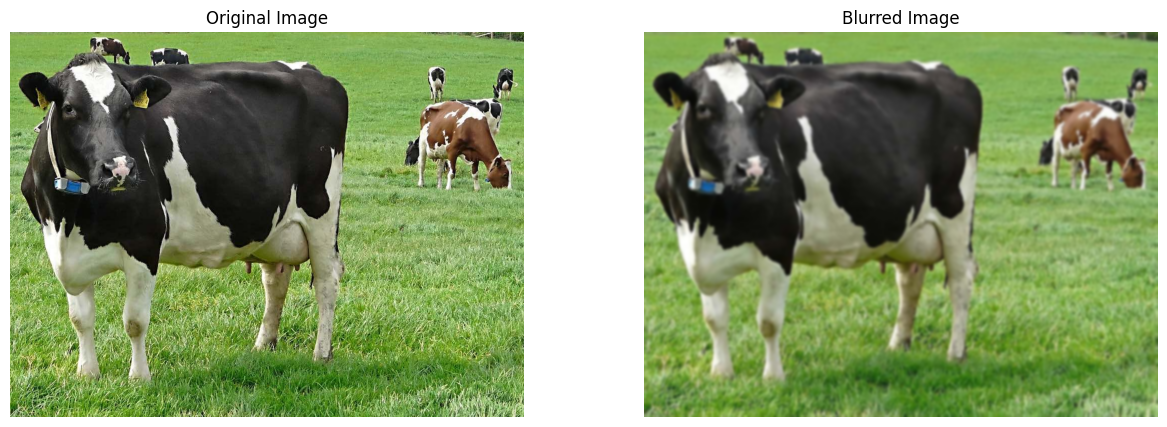

In [37]:
# 4. Local operation: Blurring
blurred_image = cv2.GaussianBlur(image_rgb, (15, 15), 0)

plt.figure(figsize=(15, 5))
plt.subplot(121), plt.imshow(image_rgb), plt.title('Original Image'), plt.axis('off')
plt.subplot(122), plt.imshow(blurred_image), plt.title('Blurred Image'), plt.axis('off')
plt.show()



In this step, using the cv2.GaussianBlur() function from OpenCV to apply a Gaussian blur to the image_rgb. The function takes three arguments:

* image_rgb: The input image to be blurred.
* (15, 15): The size of the Gaussian kernel, in this case, a 15x15 square.
* 0: The standard deviation of the Gaussian kernel in the X and Y directions.

Flattened image shape: (786432, 3)


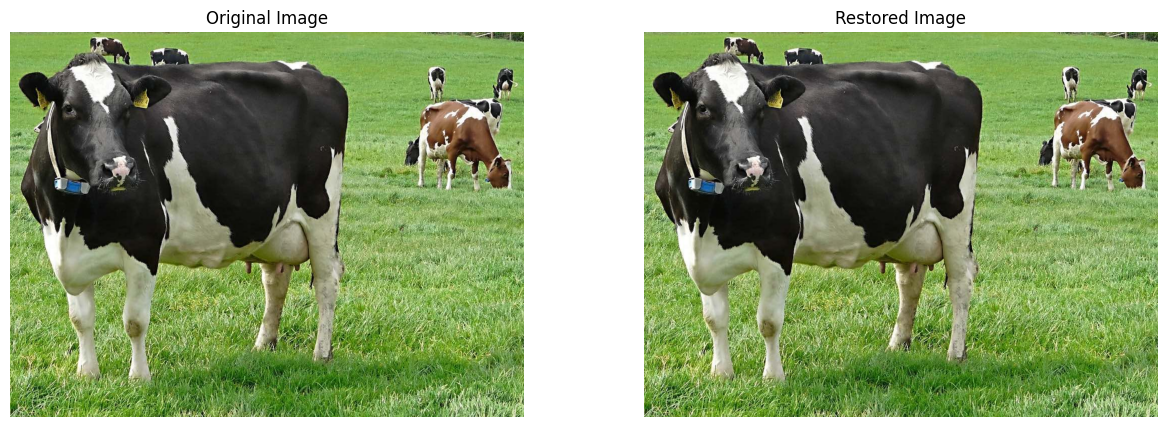

In [38]:
# 6. Reshaping image
flattened_image = image_rgb.reshape(-1, 3)
print("Flattened image shape:", flattened_image.shape)

# Reshape back to original dimensions
restored_image = flattened_image.reshape(image_rgb.shape)

plt.figure(figsize=(15, 5))
plt.subplot(121), plt.imshow(image_rgb), plt.title('Original Image'), plt.axis('off')
plt.subplot(122), plt.imshow(restored_image), plt.title('Restored Image'), plt.axis('off')
plt.show()



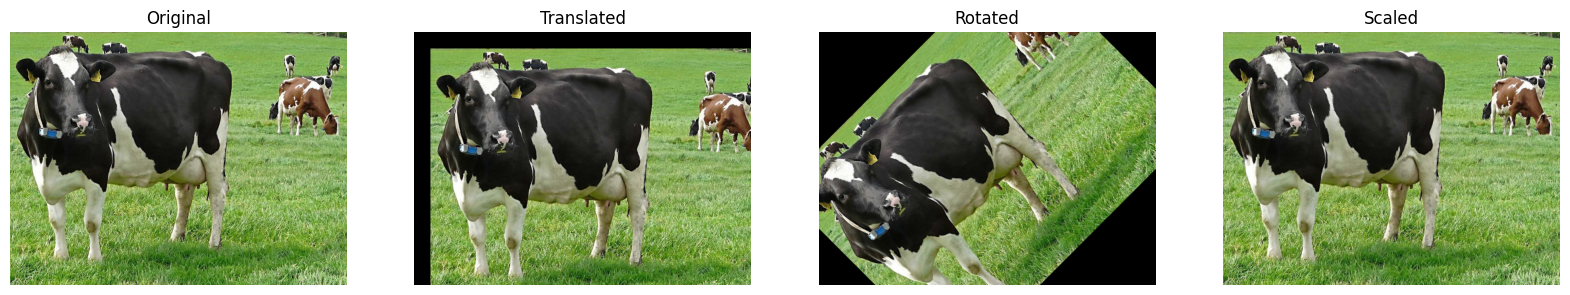

In [39]:
# 7. Pixel position transformations
def translate(image, x, y):
    rows, cols = image.shape[:2]
    M = np.float32([[1, 0, x], [0, 1, y]])
    return cv2.warpAffine(image, M, (cols, rows))

def rotate(image, angle):
    rows, cols = image.shape[:2]
    M = cv2.getRotationMatrix2D((cols/2, rows/2), angle, 1)
    return cv2.warpAffine(image, M, (cols, rows))

def scale(image, fx, fy):
    return cv2.resize(image, None, fx=fx, fy=fy, interpolation=cv2.INTER_LINEAR)

# Apply transformations
translated = translate(image_rgb, 50, 50)  # Translate 50 pixels right and down
rotated = rotate(image_rgb, 45)  # Rotate 45 degrees
scaled = scale(image_rgb, 0.5, 0.5)  # Scale to half size

# Display results
plt.figure(figsize=(20, 5))
plt.subplot(141), plt.imshow(image_rgb), plt.title('Original'), plt.axis('off')
plt.subplot(142), plt.imshow(translated), plt.title('Translated'), plt.axis('off')
plt.subplot(143), plt.imshow(rotated), plt.title('Rotated'), plt.axis('off')
plt.subplot(144), plt.imshow(scaled), plt.title('Scaled'), plt.axis('off')
plt.show()

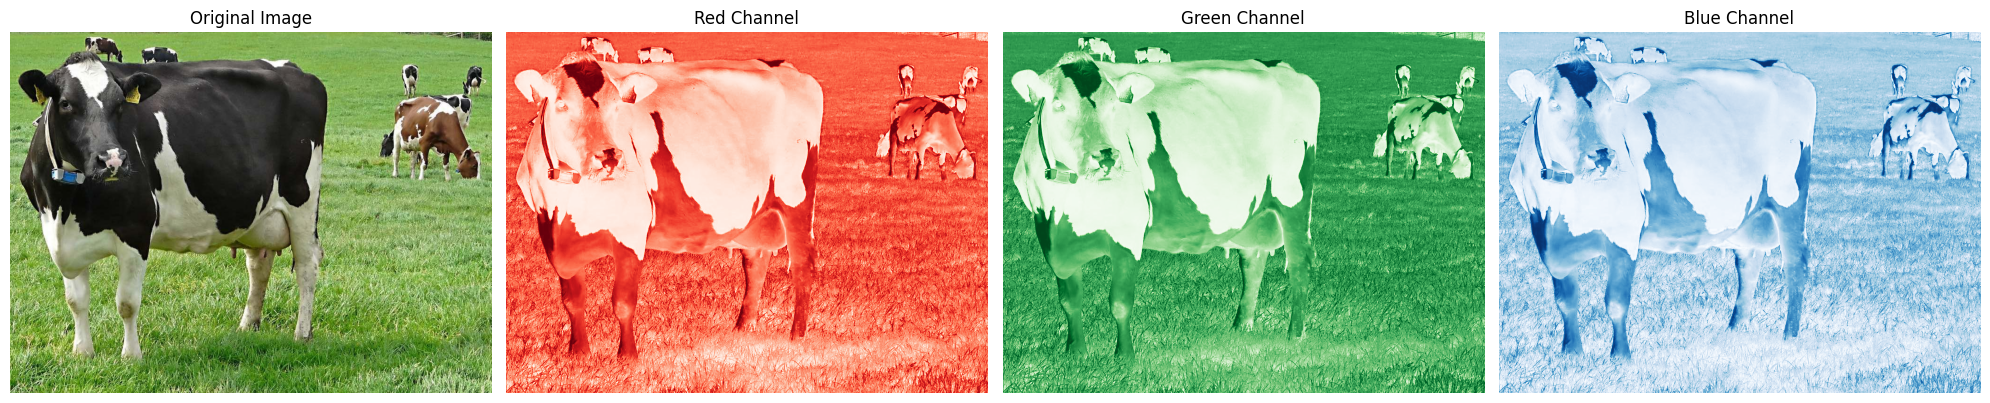

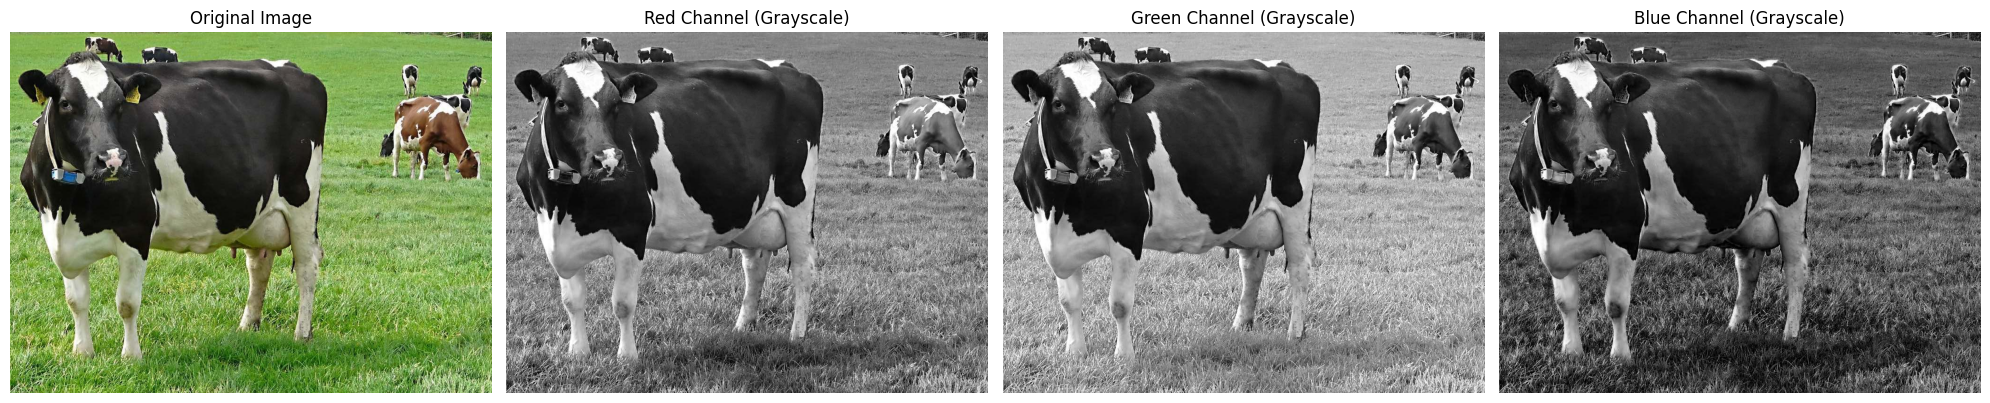

In [40]:
# 8. Plotting individual color channels

# Split the image into its three color channels
b, g, r = cv2.split(image)

# Create a figure with subplots for each channel and the original image
plt.figure(figsize=(20, 5))

# Original RGB image
plt.subplot(141)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

# Red channel
plt.subplot(142)
plt.imshow(r, cmap='Reds')
plt.title('Red Channel')
plt.axis('off')

# Green channel
plt.subplot(143)
plt.imshow(g, cmap='Greens')
plt.title('Green Channel')
plt.axis('off')

# Blue channel
plt.subplot(144)
plt.imshow(b, cmap='Blues')
plt.title('Blue Channel')
plt.axis('off')

plt.tight_layout()
plt.show()

# Optionally, you can also display the channels as grayscale images
plt.figure(figsize=(20, 5))

plt.subplot(141)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

plt.subplot(142)
plt.imshow(r, cmap='gray')
plt.title('Red Channel (Grayscale)')
plt.axis('off')

plt.subplot(143)
plt.imshow(g, cmap='gray')
plt.title('Green Channel (Grayscale)')
plt.axis('off')

plt.subplot(144)
plt.imshow(b, cmap='gray')
plt.title('Blue Channel (Grayscale)')
plt.axis('off')

plt.tight_layout()
plt.show()

## 9. Implementing Convolution

In this exercise, you'll implement a convolution operation on images. Follow these steps to create a Convolution class and use it to apply edge detection and Gaussian blur filters.

### Task: Implement the Convolution Class
Create a Convolution class with the following structure:


### Task: Create Edge Detection and Gaussian Blur Filters
After implementing the Convolution class, create two instances:

1. Edge Detection Filter: Use a Sobel filter for edge detection. You can use the following kernel:


edge_kernel = np.array([[-1, -1, -1],
                        [-1,  8, -1],
                        [-1, -1, -1]])


2. Gaussian Blur Filter: Create a 5x5 Gaussian kernel. You can use the following approximation:


gaussian_kernel = np.array([[1,  4,  6,  4, 1],
                            [4, 16, 24, 16, 4],
                            [6, 24, 36, 24, 6],
                            [4, 16, 24, 16, 4],
                            [1,  4,  6,  4, 1]]) / 256


### Task: Apply Filters and Plot Results
Apply both filters to an image and plot the results. Use matplotlib to display the original image alongside the filtered images.



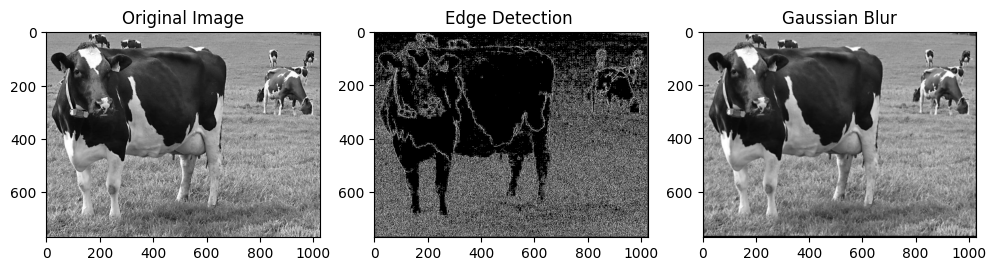

In [11]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

class Convolution:
    def __init__(self, kernel, padding=False):
        # Initialize the convolution with a kernel and padding option
        self.kernel = kernel
        self.padding = padding

    def convolve(self, image):
        # Implement the convolution operation
        # 1. If padding is True, pad the image
        if self.padding:
            pad_width = (len(self.kernel) // 2, len(self.kernel) // 2)
            image = np.pad(image, pad_width, mode='constant', constant_values=0)

        # 2. Get image dimensions
        image_height, image_width = image.shape

        # 3. Get kernel dimensions
        kernel_height, kernel_width = self.kernel.shape

        # 4. Create output image of the same size as input image
        output = np.zeros((image_height, image_width))

        # 5. Iterate over the image:
        for i in range(image_height - kernel_height + 1):
            for j in range(image_width - kernel_width + 1):
                # Extract a patch of the image the same size as the kernel
                patch = image[i:i+kernel_height, j:j+kernel_width]
                # Multiply this patch element-wise with the kernel and sum the result
                output[i, j] = np.sum(patch * self.kernel)

        # 6. Return the output image
        return output

# Edge Detection Filter
edge_kernel = np.array([[-1, -1, -1],
                       [-1,  8, -1],
                       [-1, -1, -1]])

# Gaussian Blur Filter
gaussian_kernel = np.array([[1,  4,  6,  4, 1],
                           [4, 16, 24, 16, 4],
                           [6, 24, 36, 24, 6],
                           [4, 16, 24, 16, 4],
                           [1,  4,  6,  4, 1]]) / 256

# Example usage:
image = Image.open("./images/HOLSTEIN-COW.jpg").convert("L")
image_array = np.array(image)

edge_conv = Convolution(edge_kernel, padding=True)
edge_image = edge_conv.convolve(image_array)

gaussian_conv = Convolution(gaussian_kernel, padding=True)
blur_image = gaussian_conv.convolve(image_array)

# Apply thresholding to the edge image
edge_image_threshold = np.where(edge_image > 50, 0, 255)


# Display the results
fig, axes = plt.subplots(1, 3, figsize=(12, 4))

axes[0].imshow(image_array, cmap='gray')
axes[0].set_title('Original Image')


#axes[1].imshow(edge_image, cmap='gray')
#axes[1].set_title('Edge Detection')

axes[1].imshow(edge_image_threshold, cmap='binary')
axes[1].set_title('Edge Detection ')

axes[2].imshow(blur_image, cmap='gray')
axes[2].set_title('Gaussian Blur')

plt.show()

**NOTE**
* `The method then iterates over the image, extracting a patch of the same size as the kernel, performing an element-wise multiplication between the patch and the kernel, and summing the result to get the output pixel value.`
* Filter Kernels 
1. `edge_kernel: A 3x3 kernel used for edge detection.`
2. `gaussian_kernel: A 5x5 kernel used for Gaussian blur.`